# Gráficos estacionales

En esta lección hablaremos de los gráficos estacionales, una herramienta que nos permite detectar y analizar en detalle la estacionalidad que pueda tener una Serie de Tiempo.

Así que a continuación vamos a ver de forma práctica qué son los gráficos estacionales, cómo construir este tipo de gráficos y cómo extraer información relevante de la Serie de Tiempo correspondiente.

## 1. Qué es un gráfico estacional

Un gráfico estacional es muy similar al gráfico de una Serie de Tiempo (instantes de tiempo en el eje horizontal y observaciones en el eje vertical). Sin embargo:

> En un gráfico estacional el eje horizontal representa usualmente un periodo de tiempo (meses, años, días) en lugar de instantes de tiempo y en el eje vertical graficamos múltiples periodos de la Serie de Tiempo

Entendamos esto con un ejemplo. Crearemos una Serie de Tiempo artificial donde supondremos que tenemos el registro de niveles de ventas de una tienda a partir del año 2018:

            Ventas
2018-01-31     100
2018-02-28     120
2018-03-31     130
2018-04-30     150
2018-05-31     160


C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_16884\2992263128.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index= pd.date_range(start='2018-01-01', periods=36, freq='M'),


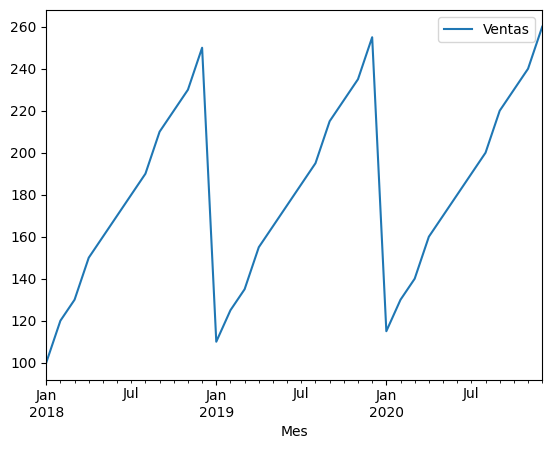

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Creemos una serie de tiempo artificial, con ventas MENSUALES
# durante cierto periodo de tiempo

datos = {
    'Ventas': [100, 120, 130, 150, 160, 170, 180, 190, 210, 220, 230, 250,
              110, 125, 135, 155, 165, 175, 185, 195, 215, 225, 235, 255,
              115, 130, 140, 160, 170, 180, 190, 200, 220, 230, 240, 260],
}
df = pd.DataFrame(datos,
                  index= pd.date_range(start='2018-01-01', periods=36, freq='M'),
                 )
print(df.head())

# Gráfico convencional
ax = df.plot();
ax.set_xlabel('Mes');

In [2]:
df

,Ventas
2018-01-31,100
2018-02-28,120
2018-03-31,130
2018-04-30,150
2018-05-31,160
2018-06-30,170
2018-07-31,180
2018-08-31,190
2018-09-30,210
2018-10-31,220


Como podemos ver esta Serie de Tiempo tiene un componente estacional con una periodicidad de 12 meses.

Podemos generar un gráfico estacional donde:

- El eje horizontal contendrá los 12 meses del año
- El eje vertical contendrá una gráfica con los niveles de ventas por cada año (2018, 2019 y 2020)

Para generar esta gráfica primero crearemos una columna que contendrá el número del año y luego una con el número del mes (esto facilitará posteriormente la generación del gráfico estacional):

In [3]:
df['año'] = df.index.year
df['mes'] = df.index.month
df

,Ventas,año,mes
2018-01-31,100,2018,1
2018-02-28,120,2018,2
2018-03-31,130,2018,3
2018-04-30,150,2018,4
2018-05-31,160,2018,5
2018-06-30,170,2018,6
2018-07-31,180,2018,7
2018-08-31,190,2018,8
2018-09-30,210,2018,9
2018-10-31,220,2018,10


Ahora generaremos una **tabla pivote o tabla dinámica** (Lección 2 del curso "Pandas Nivel Avanzado": Tablas Dinámicas a partir de DataFrames. Con esta tabla, por cada mes y por cada año tendremos el total de ventas:

In [4]:
# Tabla pivote
df_pivot = df.pivot(index='mes', columns='año', values='Ventas')
df_pivot

año,2018,2019,2020
mes,,,
1,100,110,115
2,120,125,130
3,130,135,140
4,150,155,160
5,160,165,170
6,170,175,180
7,180,185,190
8,190,195,200
9,210,215,220


Y a partir de esta tabla ya podemos generar el gráfico estacional. Simplemente graficamos cada año con un color diferente y ubicamos en el eje horizontal el mes correspondiente:

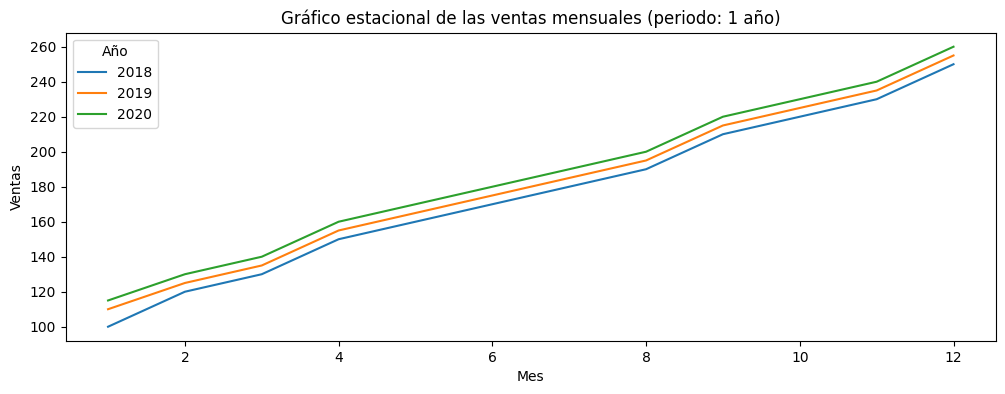

In [5]:
# Por cada año graficar el comportamiento mes a mes
df_pivot.plot(figsize=(12,4))
plt.title('Gráfico estacional de las ventas mensuales (periodo: 1 año)')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.legend(title='Año');

Básicamente lo que hemos hecho ha sido superponer los años (es decir la estación) para ver por ejemplo cuáles meses tienen más o menos ventas.

En este ejemplo hipotético podemos concluir por ejemplo que:

- Las ventas se han venido incrementando año tras año
- El mes con más ventas en los 3 años es diciembre y el mes con menos ventas es enero

Veamos ahora ejemplos prácticos con datos reales.

## 2. Gráfico estacional del set "CO2"

Comencemos leyendo y graficando esta Serie de Tiempo:

              co2
fecha            
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


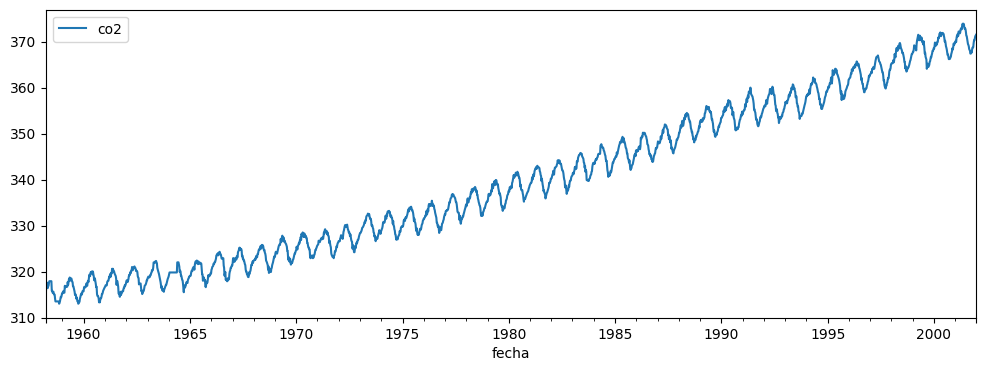

In [7]:
# Leer dataset co2
import pandas as pd

RUTA = '../datasets/EDA/'
co2_df = pd.read_csv(RUTA + 'co2.csv', 
                     parse_dates=['fecha'],
                     index_col='fecha'
                    )

# Imprimir encabezado
print(co2_df.head())

# Graficar
co2_df.plot(figsize=(12,4));

Y recordemos que tiene un componente estacional que se repite anualmente. Así que la idea es construir un gráfico estacional con esta periodicidad.

Sin embargo, la Serie original tiene una periodicidad semanal. Así que primero debemos obtener una periodicidad mensual, para lo cual podemos usar "resample":

In [8]:
# Serie de tiempo remuestreada con periodicidad mensual
# Por cada mes se calculará el total de emisiones (suma)
co2_M = co2_df.resample('M').sum()
co2_M

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_16884\1811553607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  co2_M = co2_df.resample('M').sum()


,co2
fecha,
1958-03-31,316.1
1958-04-30,1268.8
1958-05-31,1587.1
1958-06-30,1271.6
1958-07-31,1262.5
...,...
2001-08-31,1477.7
2001-09-30,1839.4
2001-10-31,1472.2


Ahora podemos hacer lo mismo que en el caso anterior: 

1. Agregar una columna "mes" y una columna "año"
2. Generar una tabla pivote por mes y año
3. Generar el gráfico correspondiente

Esta sería la implementación:

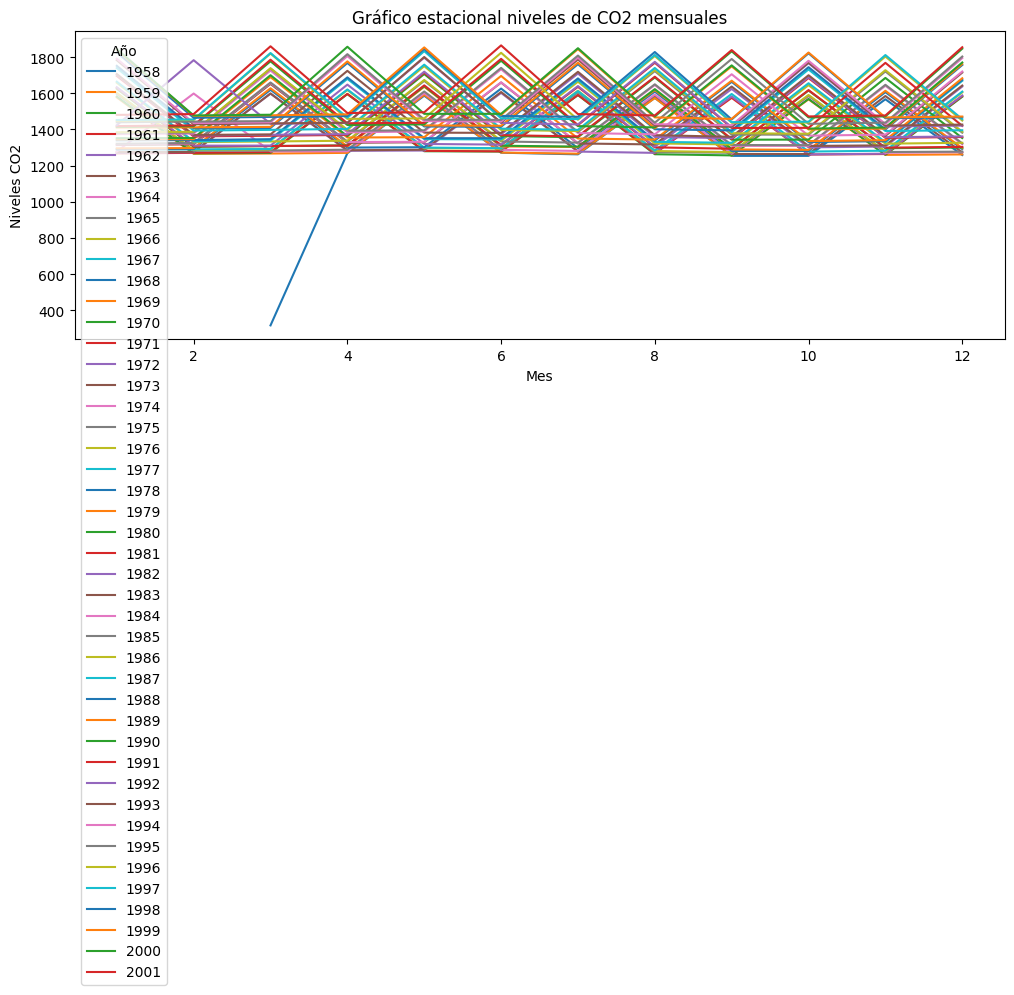

In [9]:
# Agregar columnas mes y año
co2_M['mes'] = co2_M.index.month
co2_M['año'] = co2_M.index.year

# Tabla pivote
co2_M_pivot = co2_M.pivot(index='mes', columns='año', values='co2')
co2_M_pivot

# Plot
co2_M_pivot.plot(figsize=(12,4))
plt.title('Gráfico estacional niveles de CO2 mensuales')
plt.xlabel('Mes')
plt.ylabel('Niveles CO2')
plt.legend(title='Año')
plt.show()

En ocasiones no resulta fácil interpretar el gráfico pues debemos tener en cuenta que la Serie de Tiempo podría tener componentes adicionales al estacional (como es el caso).

Una alternativa es:

1. Extraer el componente estacional de la Serie
2. Generar el gráfico estacional a partir del componente estacional de la Serie

Veamos esta implementación, comenzando con la extracción del componente estacional:

In [10]:
from statsmodels.tsa.seasonal import STL

# Descomposición STL CO2
co2_stl = STL(
    co2_df,
    seasonal = 13).fit()

# Extraer el componente estacional como un DataFrame de Pandas
co2_seas = co2_stl.seasonal.to_frame("co2")
co2_seas

,co2
fecha,
1958-03-29,1.011757
1958-04-05,2.071207
1958-04-12,2.094911
1958-04-19,2.040090
1958-04-26,1.928559
...,...
2001-12-01,-1.122142
2001-12-08,-0.607338
2001-12-15,-0.528068


Y repitamos los mismos pasos anteriores pero esta vez sobre el componente estacional:

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_16884\3076080412.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  co2_sM = co2_seas.resample('M').sum()


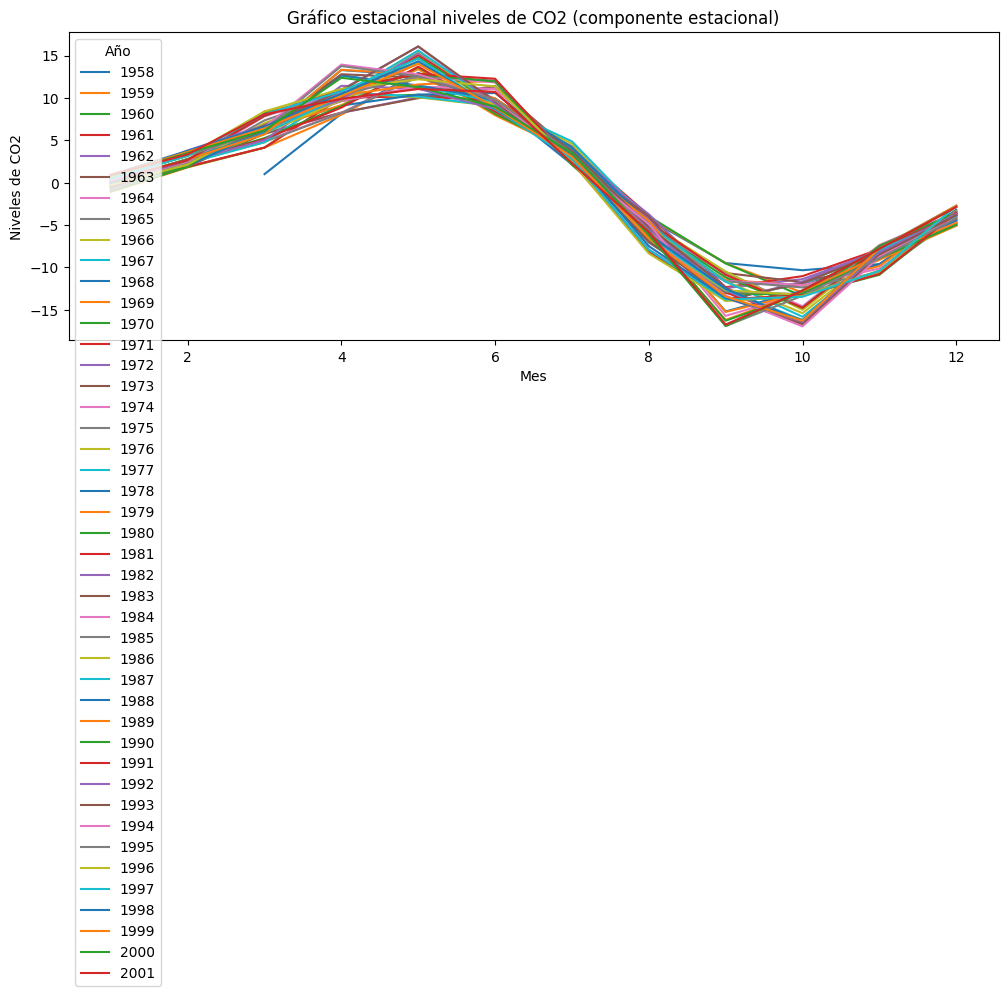

In [11]:
# Remuestreo mensual
co2_sM = co2_seas.resample('M').sum()

# Agregar columnas "mes" y "año"
co2_sM['mes'] = co2_sM.index.month
co2_sM['año'] = co2_sM.index.year

# Tabla pivote
co2_sM_pivot = co2_sM.pivot(index='mes', columns='año', values='co2')

# Gráfico
co2_sM_pivot.plot(figsize=(12,4))
plt.title('Gráfico estacional niveles de CO2 (componente estacional)')
plt.xlabel('Mes')
plt.ylabel('Niveles de CO2')
plt.legend(title='Año')
plt.show()

Y ya se observa un patrón mucho más fácil de analizar. Por ejemplo, podemos ver que el mes de mayo tiene más emisiones y el mes con menores emisiones históricamente es el mes de octubre.

Como tenemos tantos años, podemos tomar sólo una parte de estos para facilitar la visualización:

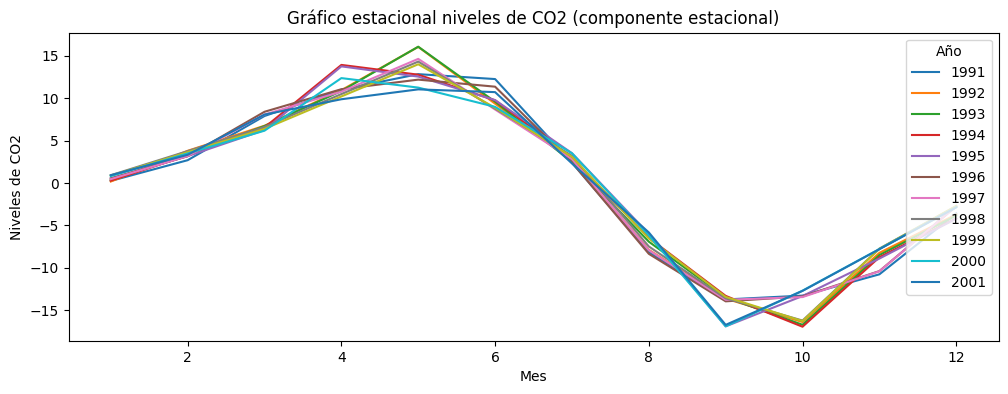

In [11]:
# Tabla pivote
co2_sM_pivot = co2_sM['1991':].pivot(index='mes', columns='año', values='co2')

# Gráfico
co2_sM_pivot.plot(figsize=(12,4))
plt.title('Gráfico estacional niveles de CO2 (componente estacional)')
plt.xlabel('Mes')
plt.ylabel('Niveles de CO2')
plt.legend(title='Año')
plt.show()

## 3. Gráfico estacional del set pasajeros

Comencemos leyendo y graficando esta Serie de Tiempo:

            nro
fecha          
1949-01-31  112
1949-02-28  118
1949-03-31  132
1949-04-30  129
1949-05-31  121


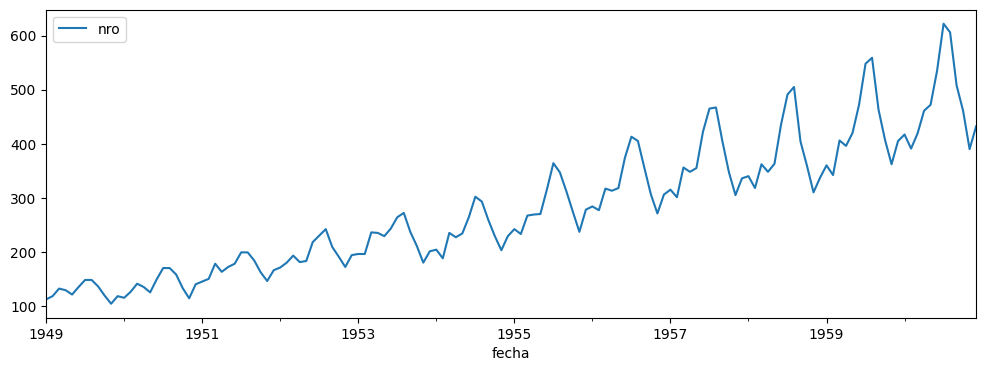

In [12]:
pasaj_df = pd.read_csv(RUTA + 'pasajeros.csv',
                       parse_dates=['fecha'],
                       index_col='fecha'
                      ).sort_index()

# Imprimir encabezado
print(pasaj_df.head())

# Graficar
pasaj_df.plot(figsize=(12,4));

E intentemos generar un gráfico estacional sin necesidad de descomponer la Serie:

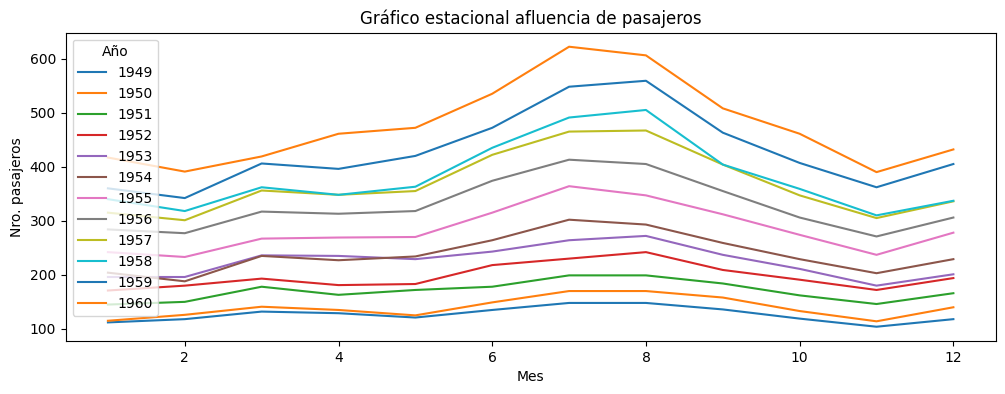

In [15]:
#pasaj_df = pasaj_df.resample('M').sum()

# La serie ya tiene frecuencia mensual, así que comencemos
# creando las columnas mes y año
pasaj_df['mes'] = pasaj_df.index.month
pasaj_df['año'] = pasaj_df.index.year

# Tabla pivote
pivot_df = pasaj_df.pivot(index='mes', columns='año', values='nro')

# Plot
pivot_df.plot(figsize=(12,4))
plt.title('Gráfico estacional afluencia de pasajeros')
plt.xlabel('Mes')
plt.ylabel('Nro. pasajeros')
plt.legend(title='Año')
plt.show()

Y vemos que en este caso no resulta necesario descomponer la Serie antes de generar el gráfico. Al igual que con el caso del CO2 podemos hacer algunas observaciones a partir del gráfico estacional:

- En los meses de julio y agosto se tiene la mayor afluencia de pasajeros
- La cantidad de pasajeros transportados por la aerolínea se ha venido incrementando año tras año

## 4. Aspectos a tener en cuenta

- Un gráfico estacional nos permite analizar de forma detallada el comportamiento de la Serie de Tiempo en cada estación
- En ocasiones, si generamos el gráfico directamente a partir de la Serie de Tiempo, no resulta fácil de interpretar su contenido debido a que la Serie puede tener otros componentes (como por ejemplo una marcada tendencia). En este caso se sugiere construir el gráfico a partir del componente estacional.